In [10]:
%load_ext autoreload
%autoreload 2

from beqanalyser import DistanceParams
from beqanalyser.analyser import HDBSCANParams, build_all_composites
import numpy as np
from collections import defaultdict
from beqanalyser.loader import load, load_or_compute_distance_matrix

min_freq = 5
max_freq = 50
fan_counts = (5, 10, 20, 50, 100)
use_constraints = True

catalogue, data_hash = load()
by_author_by_year = defaultdict(lambda: defaultdict(int))

freqs = catalogue[0].mag_freqs
in_band_freqs = freqs[(freqs >= min_freq) & (freqs <= max_freq)]
responses_db = np.array([f.mag_db - f.mag_db[-1] for f in catalogue])

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
distance_params = DistanceParams()

full_distance_matrix = load_or_compute_distance_matrix(
    input_curves=responses_db,
    freqs=freqs,
    band=(min_freq, max_freq),
    distance_params=distance_params,
    data_hash=data_hash,
)

In [3]:

params = [
    HDBSCANParams(
        min_cluster_size=50, min_samples=10, cluster_selection_epsilon=10.0
    ),
    HDBSCANParams(
        min_cluster_size=50, min_samples=10, cluster_selection_epsilon=10.0
    ),
    HDBSCANParams(
        min_cluster_size=50, min_samples=8, cluster_selection_epsilon=10.0
    ),
    HDBSCANParams(
        min_cluster_size=50, min_samples=5, cluster_selection_epsilon=10.0
    ),
    HDBSCANParams(
        min_cluster_size=20, min_samples=5, cluster_selection_epsilon=10.0
    ),
    HDBSCANParams(
        min_cluster_size=20, min_samples=5, cluster_selection_epsilon=10.0
    ),
]

result = build_all_composites(
    input_curves=responses_db,
    freqs=freqs,
    band=(min_freq, max_freq),
    fan_counts=fan_counts,
    iteration_params=params,
    distance_params=distance_params,
    full_distance_matrix=full_distance_matrix,
    final_assignment_threshold_multiplier=1.0
)

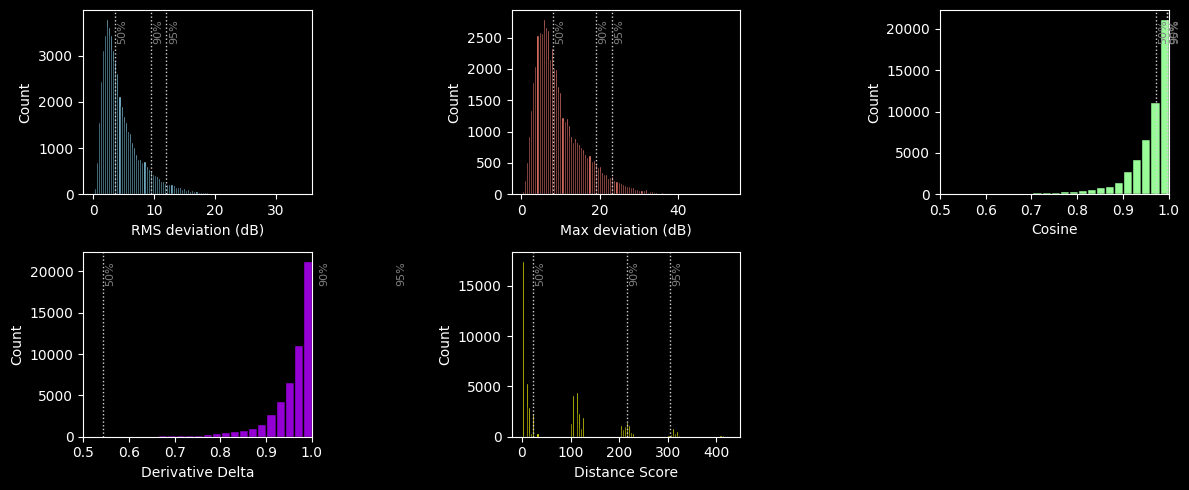

In [4]:
from beqanalyser.reporter import plot_distance_histograms

plot_distance_histograms(result.composites)

In [5]:
from beqanalyser.reporter import plot_distance_by_composite

plot_distance_by_composite(result.composites, in_band_freqs)

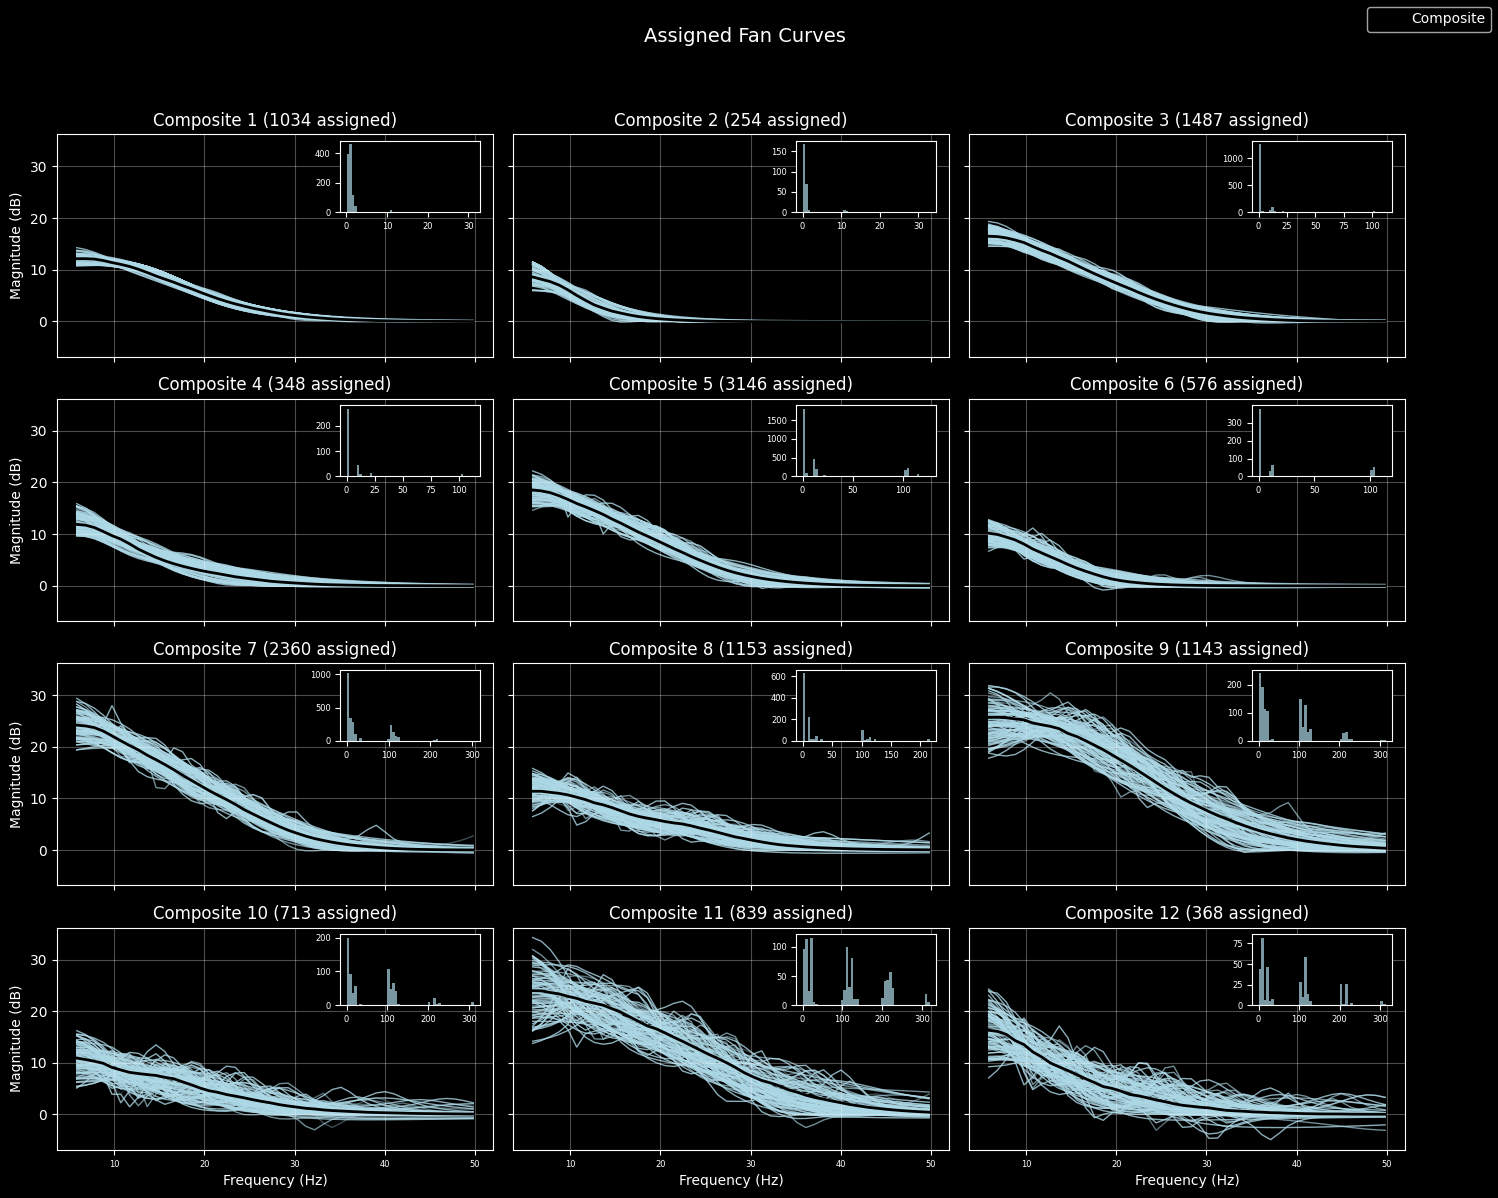

In [6]:
from beqanalyser.reporter import plot_assigned_fan_curves

plot_assigned_fan_curves(result.composites, in_band_freqs)

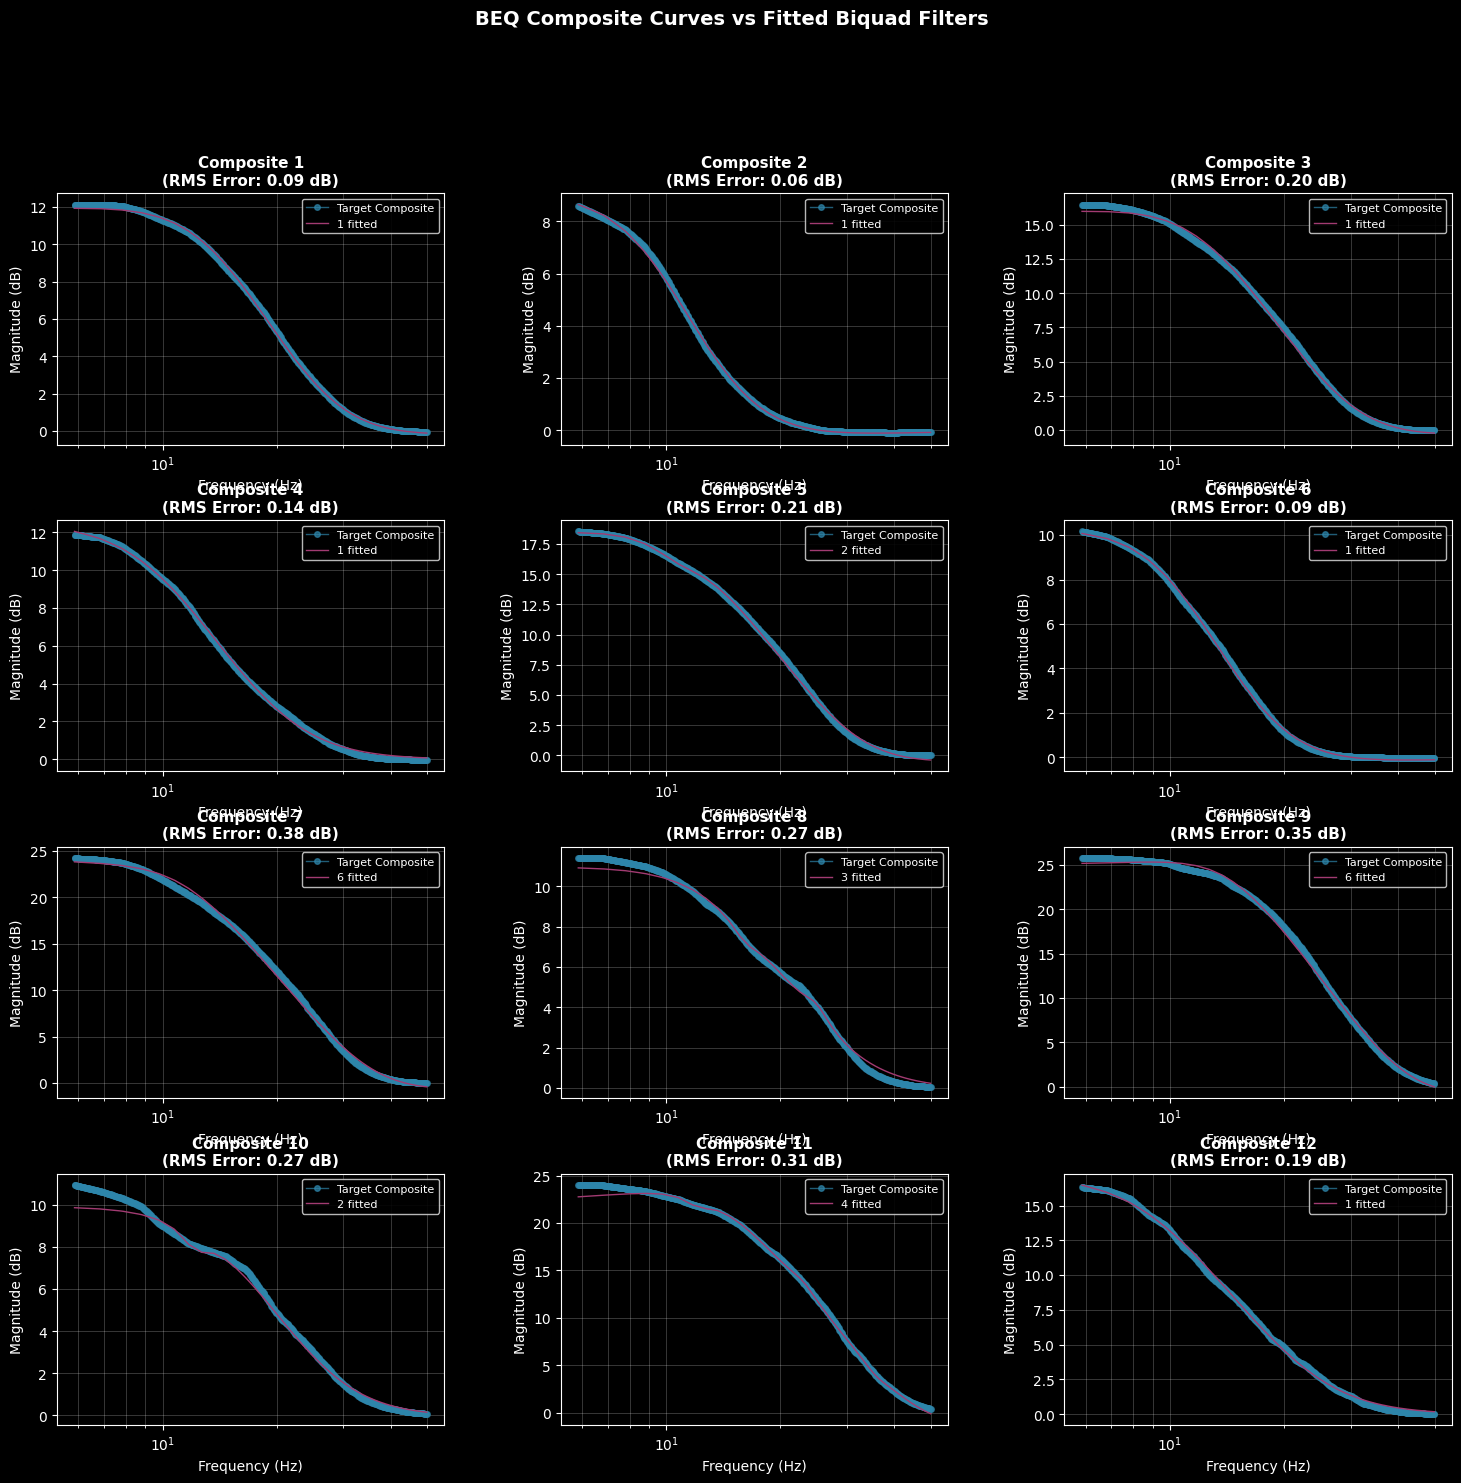

['Composite 1 BiquadFilter(lowshelf, fc=19.0Hz, gain=11.78dB, Q=0.810)',
 'Composite 2 BiquadFilter(lowshelf, fc=11.4Hz, gain=8.83dB, Q=0.805)',
 'Composite 3 BiquadFilter(lowshelf, fc=19.1Hz, gain=15.70dB, Q=0.840)',
 'Composite 4 BiquadFilter(lowshelf, fc=13.9Hz, gain=12.50dB, Q=0.718)',
 'Composite 5 BiquadFilter(lowshelf, fc=19.0Hz, gain=18.14dB, Q=0.871)\nBiquadFilter(peaking, fc=10.7Hz, gain=-1.20dB, Q=2.358)',
 'Composite 6 BiquadFilter(lowshelf, fc=13.3Hz, gain=10.06dB, Q=0.807)',
 'Composite 7 BiquadFilter(lowshelf, fc=20.4Hz, gain=19.99dB, Q=0.946)\nBiquadFilter(lowshelf, fc=8.3Hz, gain=5.11dB, Q=0.386)\nBiquadFilter(lowshelf, fc=5.0Hz, gain=-0.08dB, Q=3.420)\nBiquadFilter(lowshelf, fc=5.0Hz, gain=-0.06dB, Q=0.200)\nBiquadFilter(lowshelf, fc=5.8Hz, gain=0.01dB, Q=0.200)\nBiquadFilter(lowshelf, fc=6.7Hz, gain=-0.00dB, Q=0.685)',
 'Composite 8 BiquadFilter(lowshelf, fc=20.4Hz, gain=10.93dB, Q=0.741)\nBiquadFilter(peaking, fc=24.9Hz, gain=0.74dB, Q=5.000)\nBiquadFilter(peaking, 

In [7]:
from beqanalyser.reporter import plot_filter_comparison
from beqanalyser.filter import fit_all_composites

fit_results = fit_all_composites(result.composites, in_band_freqs, max_filters=6, residual_threshold=0.1)
plot_filter_comparison(fit_results)
[f"Composite {i+1} {'\n'.join([f'{f}' for f in v['filters']])}" for i, v in fit_results.items()]

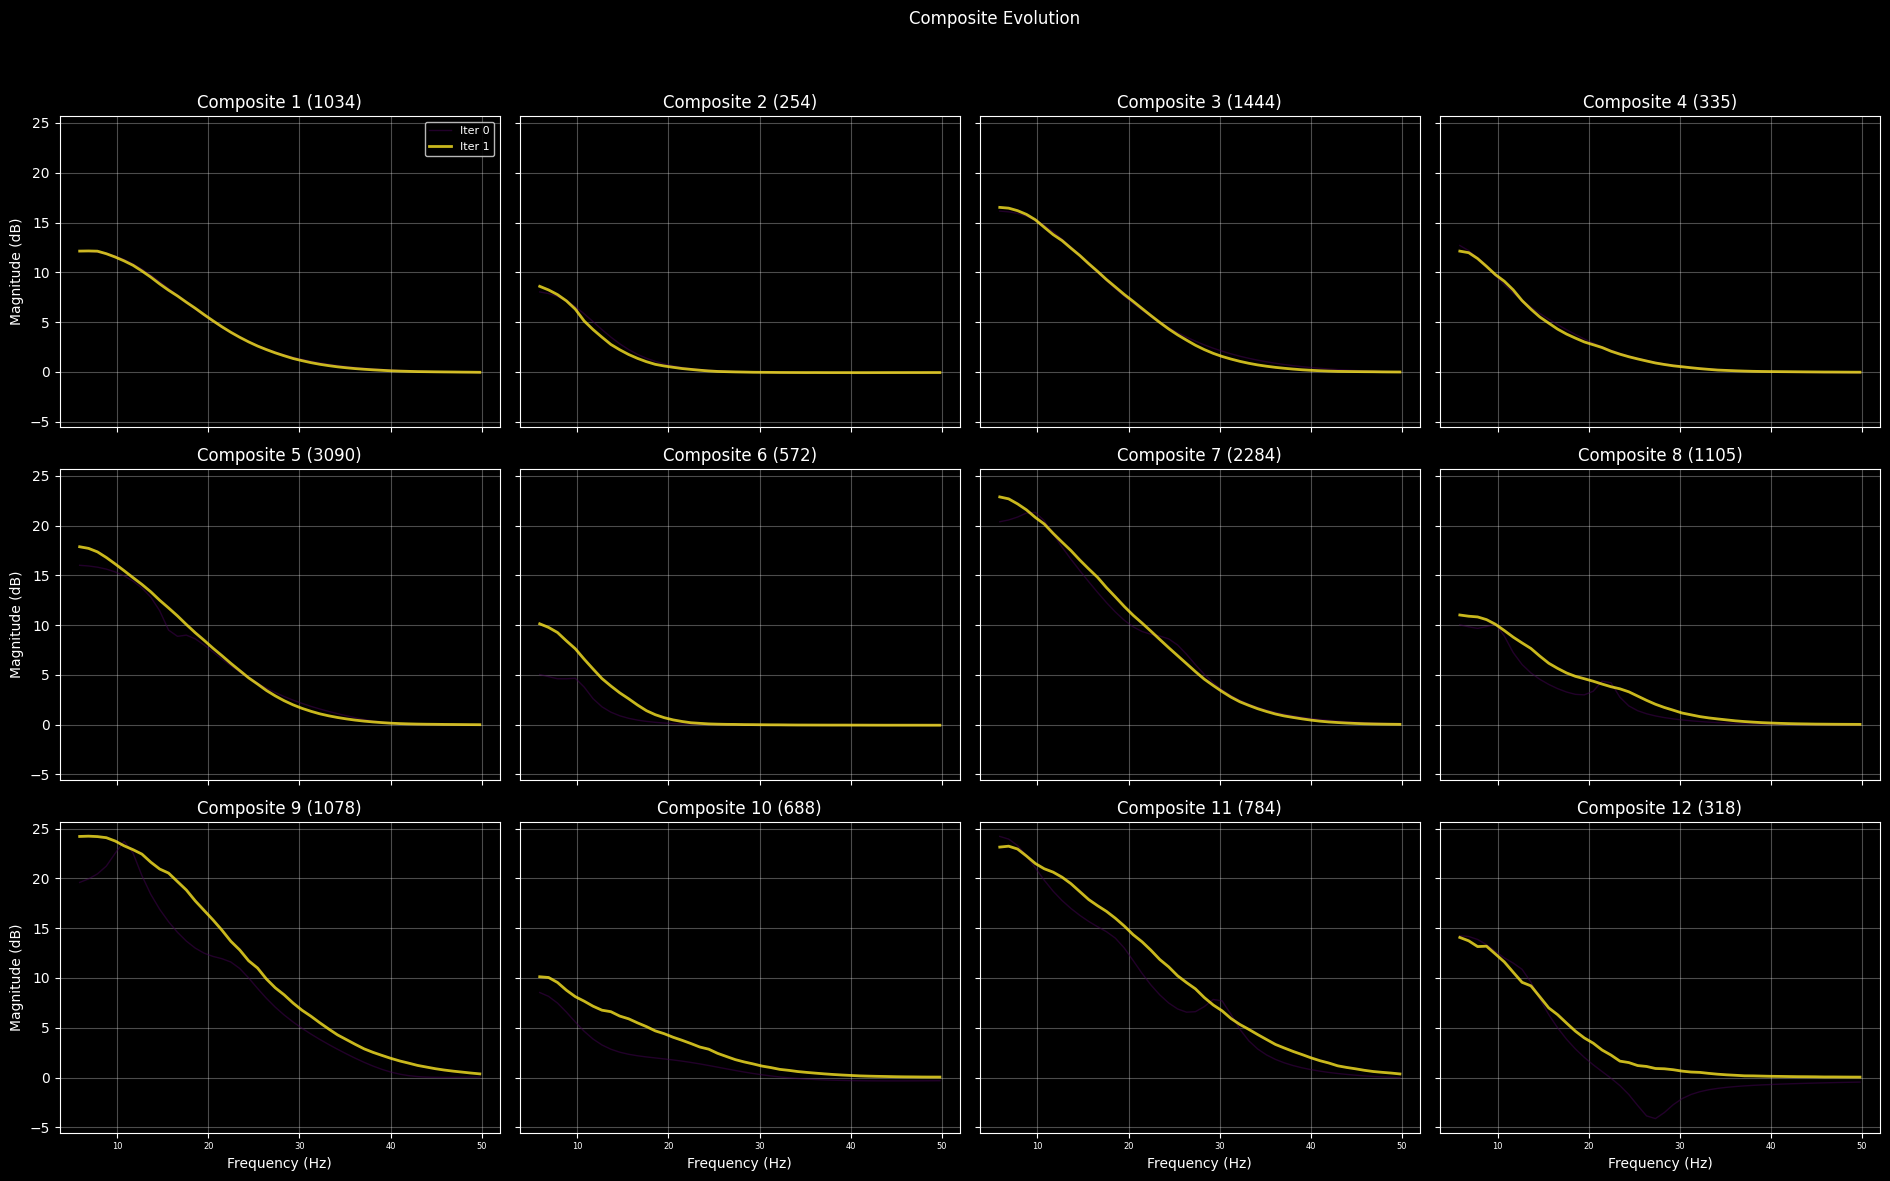

In [8]:
from beqanalyser.reporter import plot_composite_evolution

plot_composite_evolution(result, freqs, band=(min_freq, max_freq))

In [9]:
import logging
from beqanalyser.reporter import summarise_result, print_assignments, summarise_assignments

print_assignments(result.composites, catalogue)
summarise_result(result)
for i, c in enumerate(result.calculations, start=1):
    summarise_assignments(i, c, level=logging.INFO)